In [1]:
# Import the numpy library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# define the Kmeans class
class Kmeans:
    def __init__(self, n_clusters=2, max_iter=100, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    # Initialize the centroids
    def place_random_centroids(self, X): 
        random_idx = np.random.RandomState(self.random_state).permutation(X.shape[0]) # Randomly permute a sequence
        centroids = X[random_idx[:self.n_clusters]] # picks the first n_clusters and 
        # finds their value in X
        return centroids

    # Compute the average for creating new centroids
    def compute_average(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0) 
        return centroids

    # Calculate the euclidean distance between two data points
    def euclidean_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    # Find the closest clusters based on the calculated distances
    def find_closest_cluster(self, distance):
        # argmin Returns the indices of the minimum values along an axis.
        labels = np.argmin(distance, axis=1)
        return labels

    # Sum of squared distance (ssd)
    def compute_ssd(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = np.linalg.norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))

    # Putting it all together in the fit function
    def fit(self, X):
        # start with random centroids
        self.centroids = self.place_random_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.euclidean_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_average(X, self.labels)
            if np.all(old_centroids == self.centroids): # checks if they have changed
                break
        self.error = self.compute_ssd(X, self.labels, self.centroids)
        return self.error, self.centroids, self.labels

    def predict(self, X):
        distance = self.euclidean_distance(X, old_centroids)
        labels = self.find_closest_cluster(distance)
        return labels          

In [3]:
def find_k(X,K_start=1, K_end=5):
    ssd_list = []
    K_list = []
    for k in range(K_start, K_end):
        K_list.append(k)
        kmeanModel = Kmeans(n_clusters=k)    
        error, centroids, labels = kmeanModel.fit(X)
        ssd = kmeanModel.compute_ssd(X_scaled,labels,centroids)
        ssd_list.append(ssd)
    plt.figure(figsize=(16,5))
    plt.plot(K_list, ssd_list, 'rx-')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Finding optimal k using elbow method')
    plt.show()

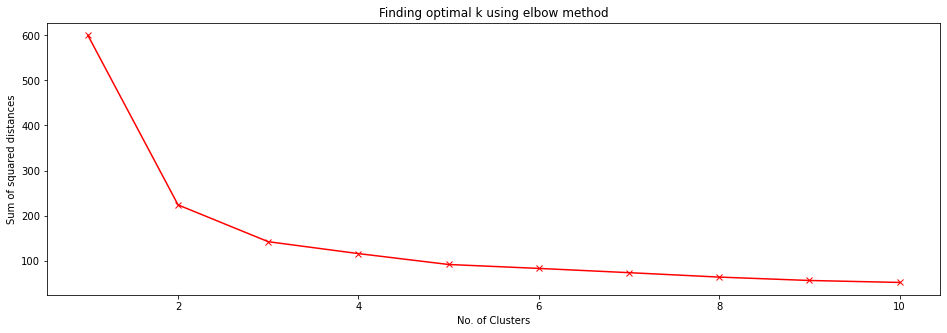

In [7]:
# import the data
import pandas as pd
iris_data = pd.read_csv("iris (4).data", header = None)

# Separate X and y
X = np.array(iris_data.drop([iris_data.columns[-1]], axis = 1))
y = np.array(iris_data[iris_data.columns[-1]])

# Scaling X
X_scaled = (X - np.mean(X, axis= 0))/np.std(X, axis = 0)
# Determining number of clusters given a range from 1 to 11
find_k(X_scaled,1,11)

# Defining the KMeans model with the required number of clusters
model = Kmeans(n_clusters=3)
error, centroids, labels = model.fit(X_scaled)

In [8]:
# Evaluation of the Kmeans Algorithm
true_labels = y
pred_labels = labels
num_correct = 0
collector = {}
for i in np.unique(y):
    collector[i] = {}
    for j in range(3):
        collector[i][j] = []
for i in range(true_labels.shape[0]):
    collector[true_labels[i]][pred_labels[i]].append(1)
for i in np.unique(y):
    temp = -1
    for j in range(len(collector[i])):
        temp = max(temp,len(collector[i][j]))
        if temp == len(collector[i][j]):
            cluster_class = j
    print("Class {} is labelled as class {} after Kmeans clustering algorithm".format(i,cluster_class))
    num_correct = num_correct + temp
    
print(f'Accuracy = {round(num_correct/true_labels.shape[0]*100,2)}%')

Class Iris-setosa is labelled as class 2 after Kmeans clustering algorithm
Class Iris-versicolor is labelled as class 1 after Kmeans clustering algorithm
Class Iris-virginica is labelled as class 0 after Kmeans clustering algorithm
Accuracy = 85.33%
